In [1]:
#Titanic Tutorial Part 2
#Graphics Analysis
#Feature Reduction (Extraction/Selection)
#Filling in Missing Values

In [2]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt

In [3]:
#Step 1:  Load data into a dataframe
addr1 = "train.csv"
data = pd.read_csv(addr1)

In [41]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_log1p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2.202765


In [4]:
# Step 11 - fill in missing values and eliminate features
#fill the missing age data with median value
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)
fill_na_median(data['Age'])

In [5]:
# check the result
print(data['Age'].describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [6]:
# fill with the most represented value
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

fill_na_most(data['Embarked'])

In [7]:
# check the result
print(data['Embarked'].describe())

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [8]:
# import package
import numpy as np

In [9]:
# log-transformation
def log_transformation(data):
    return data.apply(np.log1p)
data['Fare_log1p'] = log_transformation(data['Fare'])

In [10]:
# check the data
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Fare_log1p  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    2.962246  
std      0.806057   49.693429    0.969048  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    2.187218  
50%      0.000000   14.454200    2.737881  
75%      0.000000   31.000000    3.465736  
max      6.000000

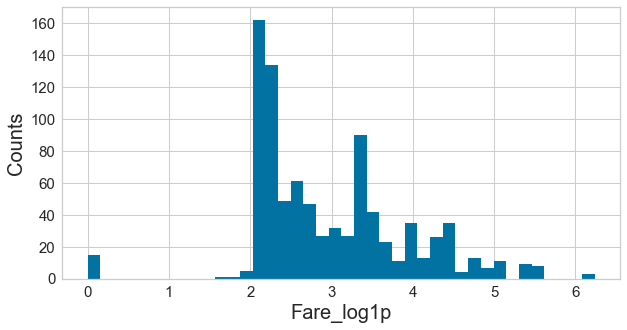

In [11]:
#Step 12 - adjust skewed data (fare)
#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(data['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

In [12]:
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = data[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  \
0           0           0           1           0         1           0   
1           1           0           0           1         0           1   
2           0           0           1           1         0           0   
3           1           0           0           1         0           0   
4           0           0           1           0         1           0   
5           0           0           1           0         1           0   
6           1           0           0           0         1           0   
7           0           0           1           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1  


In [13]:
#LR with L1 accuracy
#LR with L2 accuracy (NOTE:  change the penalty to "L2" in last section)
#load libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
#Create the Datasets
# Load the iris dataset
iris = datasets.load_iris()

In [15]:
# Create X from the features
X = iris.data
# Create y from output
y = iris.target

In [16]:
#Display original data
print("Features:  ", X[0:5])
print ("Target:  ", y)

Features:   [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [17]:
# Remake the variable, keeping all data where the category is not 2.
X = X[y != 2]
y = y[y != 2]

In [18]:
#display features and target data
print("Features:  ", X[0:5])
print ("Target:  ", y)

Features:   [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [19]:
#split data into training/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
#standardize features
# Create a scaler object
sc = StandardScaler()

In [21]:
# Fit the scaler to the training data and transform
X_train_std = sc.fit_transform(X_train)

# Apply the scaler to the test data
X_test_std = sc.transform(X_test)

In [22]:
#Run LR with L1 at various strengths ******NOTE - change to L2 for second run!
C = [10, 1, .1, .001]

In [23]:
for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C: 10
Coefficient of each feature: [[-0.01087312 -3.83554924  4.34867757  0.        ]]
Training accuracy: 1.0
Test accuracy: 1.0

C: 1
Coefficient of each feature: [[ 0.         -2.27459597  2.5678302   0.        ]]
Training accuracy: 1.0
Test accuracy: 1.0

C: 0.1
Coefficient of each feature: [[ 0.         -0.821474    0.97190849  0.        ]]
Training accuracy: 1.0
Test accuracy: 1.0

C: 0.001
Coefficient of each feature: [[0. 0. 0. 0.]]
Training accuracy: 0.5
Test accuracy: 0.5



In [24]:
#Lasso Regression to reduce features

In [25]:
#load libraries
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [26]:
#Create the Datasets
# Load the iris dataset
boston = load_boston()

In [27]:
# Create features 
features = boston.data

In [28]:
# Create target
target = boston.target

In [29]:
#Display original data
print("Features:  ", features[0:5])
print ("Target:  ", target)

Features:   [[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
Target:   [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.

In [30]:
#Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

In [31]:
#Create lasso regression with alpha value
regression = Lasso(alpha=0.5)

In [32]:
#Fit the linear regression
model = regression.fit(features_standardized, target)
print(model)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [33]:
#Training a Random Forest Regressor

In [34]:
#load libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

In [35]:
#Create the Datasets
# Load the iris dataset
boston = datasets.load_boston()

In [36]:
# Create features 
features = boston.data[:,0:2]

In [37]:
# Create target
target = boston.target

In [38]:
#Display original data
print("Features:  ", features)
print ("Target:  ", target)

Features:   [[6.3200e-03 1.8000e+01]
 [2.7310e-02 0.0000e+00]
 [2.7290e-02 0.0000e+00]
 ...
 [6.0760e-02 0.0000e+00]
 [1.0959e-01 0.0000e+00]
 [4.7410e-02 0.0000e+00]]
Target:   [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  

In [39]:
#create random forest classifier object
randomforest=RandomForestRegressor(random_state=0, n_jobs=-1)

In [40]:
#train model
model = randomforest.fit(features, target)
print(model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)
